In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


<h1>Data Cleaning<h1>


In [2]:
df= pd.read_csv('data/transaction_data.csv')
df.head(3)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516384 entries, 0 to 516383
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   516384 non-null  object 
 1   stock_code    516384 non-null  object 
 2   description   514945 non-null  object 
 3   quantity      516384 non-null  int64  
 4   invoice_date  516384 non-null  object 
 5   unit_price    516384 non-null  float64
 6   cust_id       389168 non-null  float64
 7   country       516384 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.5+ MB


In [4]:
df.isna().sum()

invoice_num          0
stock_code           0
description       1439
quantity             0
invoice_date         0
unit_price           0
cust_id         127216
country              0
dtype: int64

In [5]:
df = df.dropna(subset=['description','cust_id']) # xóa dòng gtri null trong 2 cột 


In [6]:
df.isna().sum()


invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [7]:
df['invoice_num'] = df['invoice_num'].apply(lambda x: ''.join(i for i in str(x) if i.isdigit())) # chữ giữ lại ký tự số bỏ ký tự chữ

df['invoice_num'] = df['invoice_num'].astype(int)


In [8]:
df['stock_code'] = df['stock_code'].apply(lambda x: ''.join(j  for j in str(x) if j.isdigit()))
df = df[df['stock_code'] != ''] # sau khi bỏ ký tự chữ ô chỉ chứa ký tự chữ sẽ rỗng => xóa rồi ép kiểu để không lỗi
df['stock_code'] = df['stock_code'].astype(int)


In [9]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])


In [10]:
df['quantity'] = df['quantity'].abs() # chuyển số âm thành dương


In [11]:
df= df[df['unit_price'] > 0] # xóa ô có đơn giá <=0 


In [12]:
df['amount'] = df['quantity'] * df['unit_price']


In [13]:
df['day'] = df['invoice_date'].dt.day

In [14]:
df['month'] = df['invoice_date'].dt.month


In [15]:
df['hour'] = df['invoice_date'].dt.hour


In [16]:
df['year_month'] = df['invoice_date'].dt.strftime('%Y-%m')

df['year_month']

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
516379    2011-11
516380    2011-11
516381    2011-11
516382    2011-11
516383    2011-11
Name: year_month, Length: 387418, dtype: object

In [17]:
df['week_days'] = df['invoice_date'].dt.day_name()



In [18]:
df = df.drop_duplicates(keep='first')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382442 entries, 0 to 516383
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   382442 non-null  int64         
 1   stock_code    382442 non-null  int64         
 2   description   382442 non-null  object        
 3   quantity      382442 non-null  int64         
 4   invoice_date  382442 non-null  datetime64[ns]
 5   unit_price    382442 non-null  float64       
 6   cust_id       382442 non-null  float64       
 7   country       382442 non-null  object        
 8   amount        382442 non-null  float64       
 9   day           382442 non-null  int32         
 10  month         382442 non-null  int32         
 11  hour          382442 non-null  int32         
 12  year_month    382442 non-null  object        
 13  week_days     382442 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(3), int64(3), object(4)
memory us

In [20]:
df.head(5)

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,day,month,hour,year_month,week_days
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,8,2010-12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,8,2010-12,Wednesday
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday


In [21]:
#df.to_excel('D:\python_MCI\L9 - Final Project-20250701T115550Z-1-001\L9 - Final Project\data1.xlsx')

<h1>Exploratory Data Analysis (EDA)<h1>

<h2>1 - How many monthly active user (MAU) each month?<h2>

In [22]:
# Số lượng KH mua hàng trong mỗi tháng
Mau = df.groupby('year_month')['cust_id'].nunique().reset_index()
Mau.columns=['month','monthly_active_users']
Mau

,month,monthly_active_users
0,2010-12,947
1,2011-01,780
2,2011-02,791
3,2011-03,1017
4,2011-04,896
5,2011-05,1076
6,2011-06,1049
7,2011-07,982
8,2011-08,977
9,2011-09,1295


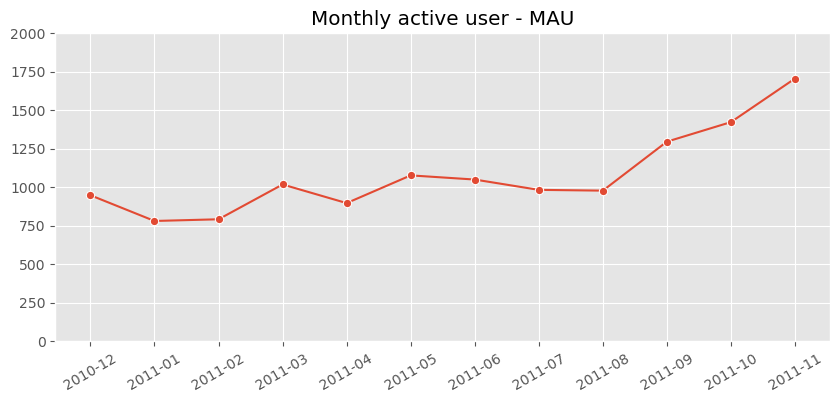

In [23]:
plt.figure(figsize=(10,4))
sns.lineplot(
    data= Mau,
    x= 'month',
    y='monthly_active_users',
    marker='o'
)
plt.xticks(rotation=30)
plt.ylim(0,2000)
plt.grid(True,ls='-')
plt.title('Monthly active user - MAU')
plt.ylabel('')
plt.xlabel('')
plt.show()

Số lượng khách hàng có xu hướng tăng theo hằng tháng. Khoảng thời gian tăng trưởng mạnh nhất từ tháng 8/2011 - 11/2011 (tăng từ 977 KH lên 1705 KH => tăng 74.5%) 
=> Số lượng KH tăng mạnh cuối năm có thể do nhu cầu mua sắp cuối năm tăng cao để đón năm mới hoặc công ty giảm giá sản phẩm cuối năm (Black Friday )hay thay đổi chiến lược Marketing 


<h2>2- How are the number of orders and total order amount each month?<h2>

In [24]:

monthly_order_summary = df.groupby('year_month').agg(
    total_invoice = ('invoice_num','nunique'),
    total_amount = ('amount', 'sum')
)
monthly_order_summary

,total_invoice,total_amount
year_month,,
2010-12,1692,582992.30
2011-01,1225,654160.28
2011-02,1180,450766.51
2011-03,1588,593827.15
2011-04,1358,488148.99
2011-05,1808,668584.94
2011-06,1686,666399.38
2011-07,1555,603489.10
2011-08,1505,658763.63


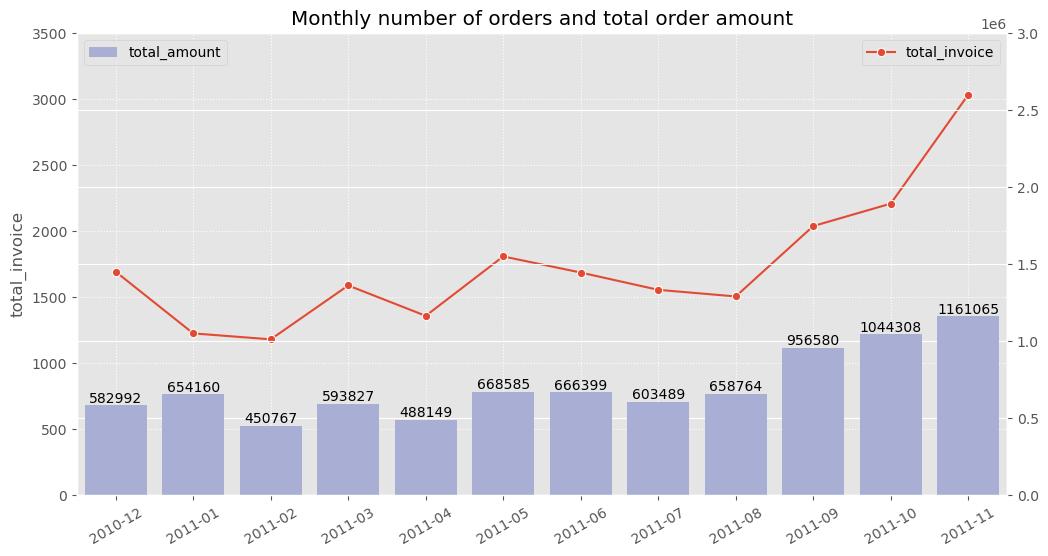

In [25]:
plt.figure(figsize=(12,6))
ax= sns.lineplot(
    data= monthly_order_summary,
    x='year_month',
    y= 'total_invoice',
    marker ='o',
    label='total_invoice'
)

plt.xticks(rotation=30)
plt.grid(True, ls=':')
plt.xlabel('')
plt.ylim(0,3500)
plt.title('Monthly number of orders and total order amount')

plt.twinx()
ax=sns.barplot(
    data= monthly_order_summary,
    x='year_month',
    y='total_amount',
    label = 'total_amount',
    color= '#A2AADB'
)
plt.bar_label(ax.containers[0], fmt= '%.0f')
plt.ylim(0,3000000)
plt.ylabel('')
plt.legend(loc=2) # lebel chú thích tránh chồng lên nhau

plt.show()

Kết quả cho thấy số lượng đơn hàng và doanh thu hằng tháng của công ty đều tăng lên, tỷ lệ thuận với số lượng KH hằng tháng phía trên. Tăng mạnh nhất từ tháng 8/11- 11/11

<h2>3- Analyze the number of customers by weekdays and by hour<h2>

In [26]:
customer_time_analysis= pd.pivot_table(
    data= df,
    index='week_days',
    columns='hour',
    values='cust_id',
    aggfunc='nunique'
)
customer_time_analysis = customer_time_analysis.loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']]
customer_time_analysis

hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
week_days,,,,,,,,,,,,,,,
Monday,NaN,4.0,78.0,223.0,283.0,309.0,398.0,400.0,332.0,286.0,191.0,100.0,9.0,NaN,NaN
Tuesday,NaN,5.0,105.0,264.0,350.0,372.0,439.0,402.0,325.0,330.0,180.0,124.0,3.0,NaN,NaN
Wednesday,NaN,4.0,98.0,283.0,356.0,346.0,465.0,413.0,361.0,351.0,254.0,94.0,NaN,1.0,1.0
Thursday,19.0,9.0,90.0,260.0,393.0,342.0,454.0,407.0,395.0,368.0,288.0,264.0,187.0,149.0,21.0
Friday,NaN,8.0,112.0,249.0,345.0,305.0,372.0,344.0,292.0,248.0,124.0,81.0,3.0,1.0,1.0
Sunday,NaN,NaN,NaN,5.0,170.0,300.0,350.0,290.0,251.0,259.0,89.0,NaN,NaN,NaN,NaN


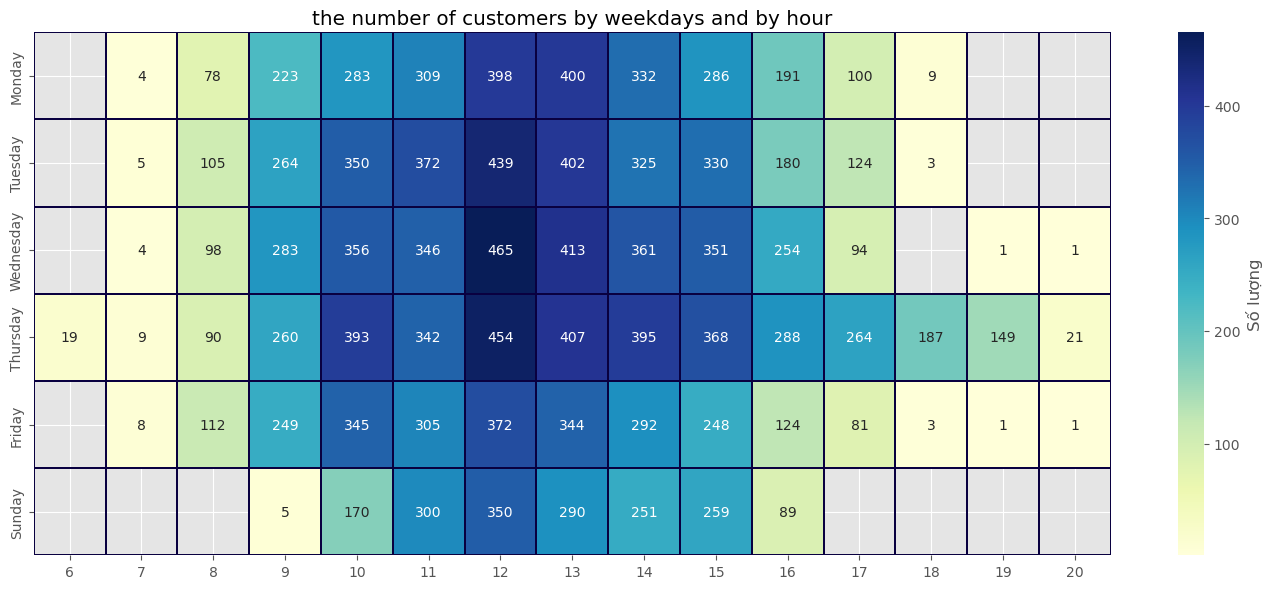

In [27]:
plt.figure(figsize=(14, 6))
sns.heatmap(
    data= customer_time_analysis,
    cmap='YlGnBu', 
    linewidths=0.3,
    linecolor='#090040',
    annot=True,
    fmt='.0f',
    cbar_kws={'label': 'Số lượng'}
)

plt.title('the number of customers by weekdays and by hour')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()

plt.show()

Công ty không có KH mua hàng vào thứ 7. Số lượng KH mua hàng nhiều rơi vào khung giờ từ 9h đến 15h (đặc biệt là khung giờ nghỉ trưa 12h) và tập trung chủ yếu vào các ngày giữa tuần từ thứ 3 đến thứ 5 thay vì cuối tuần. 

<h2>4- Top 10 Contries bring most sales for the company?<h2>

In [28]:
top10_country= df.groupby('country')['amount'].sum().sort_values(ascending=False). head(10).reset_index()
top10_country.columns= ['country','Total_amount']
top10_country

,country,Total_amount
0,United Kingdom,7042220.31
1,Netherlands,272571.12
2,EIRE,265237.30
3,Germany,202939.00
4,France,179717.77
5,Australia,139285.12
6,Spain,59333.48
7,Switzerland,53024.50
8,Japan,39296.02
9,Sweden,38015.25


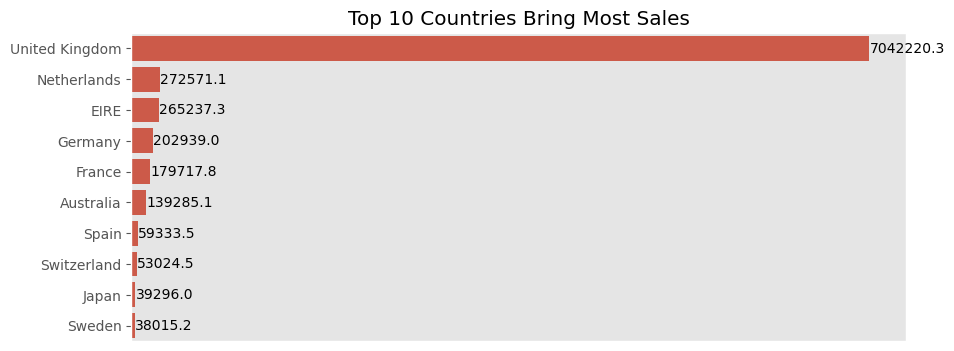

In [29]:
plt.figure(figsize= (10,4))
ax= sns.barplot(
    data = top10_country,
    x= 'Total_amount',
    y= 'country'
)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.title('Top 10 Countries Bring Most Sales')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])

plt.show()

Anh là quốc gia mang lại doanh thu cao nhất và cao vượt trội so với các quốc gia khác (cao hơn gần 7 triêu) => đây là thị trường chủ lực có vai trò quan trọng => công ty nên tập trung vào đây là chính và có thể đầu tư thêm ở các nước Netherlands, EIRE, Germany..

<h2> 5- Countries with most AOV - Average Order Value:<h2>

In [30]:
Average_order_values= df.groupby('country').agg(
    total_invoice = ('invoice_num','nunique'),
    total_amount = ('amount', 'sum')
).reset_index()
Average_order_values['AOV']= Average_order_values['total_amount']/Average_order_values['total_invoice']
Average_order_values= Average_order_values.sort_values('AOV', ascending=False). head(10).reset_index()
Average_order_values


,index,country,total_invoice,total_amount,AOV
0,23,Netherlands,93,272571.12,2930.872258
1,29,Singapore,4,9120.39,2280.097500
2,0,Australia,67,139285.12,2078.882388
3,20,Lebanon,1,1693.88,1693.880000
4,19,Japan,24,39296.02,1637.334167
5,17,Israel,6,7433.28,1238.880000
6,4,Brazil,1,1143.60,1143.600000
7,33,USA,4,4274.66,1068.665000
8,27,RSA,1,1002.31,1002.310000
9,15,Greece,4,3879.53,969.882500


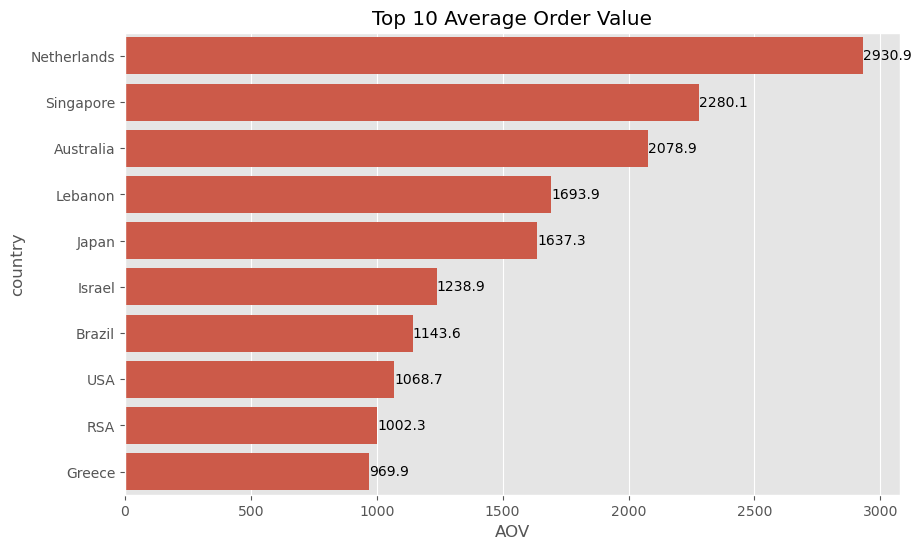

In [31]:
plt.figure(figsize=(10,6))
ax= sns.barplot(
    data = Average_order_values,
    x= 'AOV',
    y='country'
)
plt.title('Top 10 Average Order Value')
plt.bar_label(ax.containers[0], fmt='%.1f')

plt.show()

<h2>6- How many new and old customers do you have each month?<h2>

In [32]:
# lấy tháng đầu tiên mua hàng của mỗi KH 
first_order = df.groupby('cust_id')['year_month'].min()
df['first_order'] = df['cust_id'].map(first_order)
df.head()


,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,day,month,hour,year_month,week_days,first_order
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,8,2010-12,Wednesday,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday,2010-12
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,8,2010-12,Wednesday,2010-12
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday,2010-12
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday,2010-12


In [33]:
df['cust_type'] = (df['year_month'] == df['first_order']).map({True: 'New', False: 'Old'})
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,day,month,hour,year_month,week_days,first_order,cust_type
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,8,2010-12,Wednesday,2010-12,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday,2010-12,New
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,8,2010-12,Wednesday,2010-12,New
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday,2010-12,New
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday,2010-12,New


In [34]:
monthly_customer_status = (
    df.pivot_table(
        index='year_month',
        columns='cust_type',
        values='cust_id',
        aggfunc='nunique',
        fill_value=0
    ).reset_index()
)
monthly_customer_status


cust_type,year_month,New,Old
0,2010-12,947,0
1,2011-01,420,360
2,2011-02,378,413
3,2011-03,439,578
4,2011-04,298,598
5,2011-05,279,797
6,2011-06,235,814
7,2011-07,186,796
8,2011-08,167,810
9,2011-09,299,996


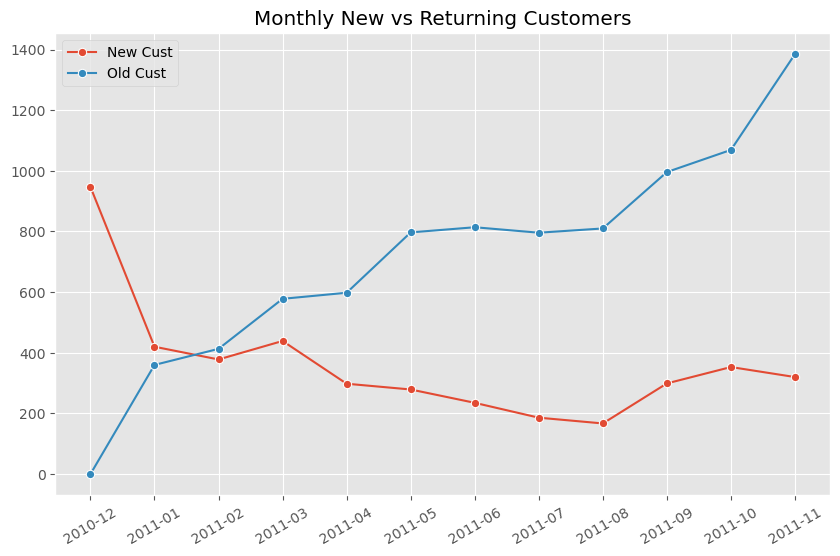

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data= monthly_customer_status,
    x= 'year_month',
    y='New',
    label='New Cust',
    marker='o'
)
sns.lineplot(
    data= monthly_customer_status,
    x= 'year_month',
    y='Old',
    label='Old Cust',
    marker='o'
)
plt.title('Monthly New vs Returning Customers')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=30)

plt.show()

Số lượng KH cũ của công ty vấn quay lại mua tăng ngày càng nhiều so với lượng khách mới thì có chiều hướng hơi giảm 
=> công ty tập trung vào giữ chân KH hàng tốt (có nhiều ưu đãi cho KH cũ) hoặc chất lượng sản phẩm và giá thành hợp lý nên KH quay lại 


<h2>7- Considering the new customers of December 2010, what is the average transaction value of these customers in each month when they return?<h2>

In [36]:
new_cust= df[(df['year_month']=='2010-12') & (df['cust_type']=='New')]['cust_id'].unique() # lay KH moi 12/2010
new_cust

array([17850., 13047., 12583., 13748., 15100., 15291., 14688., 17809.,
       15311., 16098., 18074., 17420., 16029., 16250., 12431., 17511.,
       17548., 13705., 13747., 13408., 13767., 17924., 13448., 15862.,
       15513., 12791., 16218., 14045., 14307., 17908., 17920., 12838.,
       13255., 16583., 18085., 13758., 13694., 15983., 14849., 17968.,
       16210., 17897., 17377., 16552., 17181., 17951., 14729., 12748.,
       15012., 12868., 17572., 14078., 14001., 12662., 15525., 14237.,
       17905., 15485., 12433., 16955., 15350., 15605., 18144., 15922.,
       14594., 15165., 14911., 16456., 17841., 12472., 17346., 17643.,
       17873., 13093., 12921., 13468., 17760., 16928., 16048., 16274.,
       14496., 14696., 16539., 17025., 13777., 17690., 12947., 17460.,
       18229., 14142., 17069., 13065., 14606., 16835., 15235., 13576.,
       18011., 13090., 15694., 14741., 13715., 14092., 17732., 12855.,
       15752., 17855., 14047., 17925., 13941., 17017., 14135., 13108.,
      

In [37]:
 # kiem tra id Kh thuoc KH moi 12/10 => tinh tong doanh thu theo tung thang cua moi id
sum_amount = df[df['cust_id'].isin(new_cust)].groupby(['year_month','cust_id'])['amount'].sum().reset_index()
sum_amount

,year_month,cust_id,amount
0,2010-12,12347.0,711.79
1,2010-12,12348.0,652.80
2,2010-12,12370.0,1744.27
3,2010-12,12377.0,1001.52
4,2010-12,12383.0,555.72
...,...,...,...
4921,2011-11,18223.0,37.57
4922,2011-11,18225.0,722.54
4923,2011-11,18229.0,1100.30
4924,2011-11,18230.0,676.44


In [38]:
avg_amount= sum_amount.groupby('year_month')['amount'].mean().reset_index()
avg_amount.columns=['year_month','avg_amount']
avg_amount

,year_month,avg_amount
0,2010-12,615.620169
1,2011-01,795.123250
2,2011-02,771.548530
3,2011-03,854.281339
4,2011-04,619.831941
5,2011-05,897.866596
6,2011-06,904.649218
7,2011-07,960.925916
8,2011-08,1049.101108
9,2011-09,1312.315576


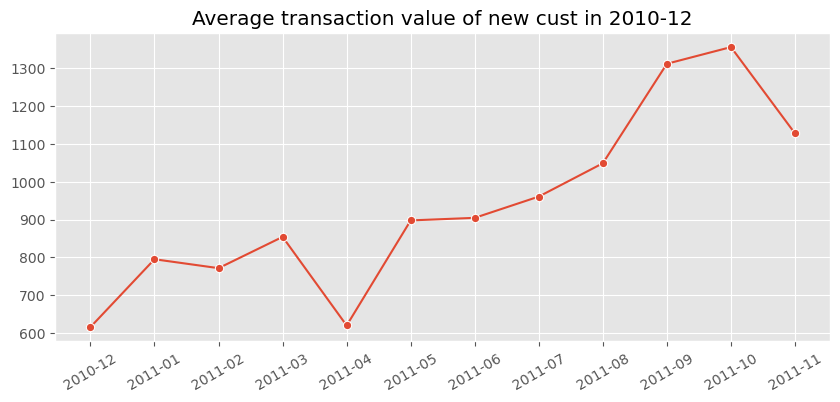

In [39]:
plt.figure(figsize=(10,4))
sns.lineplot(
    data= avg_amount,
    x= 'year_month',
    y='avg_amount',
    marker='o'
)
plt.title('Average transaction value of new cust in 2010-12')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=30)

plt.show()

Khách hàng đã mua hàng vào 12/2010 quay lại mua hàng nhiều hơn có xu hướng tăng dần qua các tháng, tăng mạnh nhất vào khoảng 7/2011- 10/2011
=> công ty giữ chân được KH có thể do sản phẩm tốt đáp ứng nhu cầu KH, chiến lược chăm sóc KH tốt, khuyến mãi tốt hoặc nhu cầu mua hàng cuối năm


<h2> 8 - Customer Segmentation:<h2>

In [40]:
#Group by theo từng cust_id và tính các chỉ số frequency và ngày giao dịch cuối cùng của từng khách hàng
# frequency: số lần KH mua hàng trong 1 khoảng thời gian
df5= df.groupby('cust_id').agg(
    last_order=('invoice_date','max'),
    frequency = ('invoice_num','nunique'),
    total_amount= ('amount','sum')
).reset_index()
df5.head()

#df.info()

,cust_id,last_order,frequency,total_amount
0,12346.0,2011-01-18 10:17:00,2,154367.20
1,12347.0,2011-10-31 12:25:00,6,4085.18
2,12348.0,2011-09-25 13:13:00,4,1437.24
3,12349.0,2011-11-21 09:51:00,1,1457.55
4,12350.0,2011-02-02 16:01:00,1,294.40


In [41]:
# tính Recency= ngày cuối cùng của data - ngày cuối cùng KH mua hàng
df5['Recency']= ((df['invoice_date'].max())-(df5['last_order'])).dt.days 
df5.info()
df5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   cust_id       4321 non-null   float64       
 1   last_order    4321 non-null   datetime64[ns]
 2   frequency     4321 non-null   int64         
 3   total_amount  4321 non-null   float64       
 4   Recency       4321 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 168.9 KB


,cust_id,last_order,frequency,total_amount,Recency
0,12346.0,2011-01-18 10:17:00,2,154367.20,316
1,12347.0,2011-10-31 12:25:00,6,4085.18,30
2,12348.0,2011-09-25 13:13:00,4,1437.24,66
3,12349.0,2011-11-21 09:51:00,1,1457.55,9
4,12350.0,2011-02-02 16:01:00,1,294.40,301
...,...,...,...,...,...
4316,18280.0,2011-03-07 09:52:00,1,180.60,268
4317,18281.0,2011-06-12 10:53:00,1,80.82,171
4318,18282.0,2011-08-09 15:10:00,2,101.66,113
4319,18283.0,2011-11-30 12:59:00,15,1831.58,0


In [42]:
df5.loc[df5['Recency']>48,'recency_score']= 1
df5.loc[(df5['Recency']>=15) & (df5['Recency']<=48),'recency_score']= 2
df5.loc[df5['Recency']<15,'recency_score']= 3

df5.loc[df5['frequency']==1,'frequency_score']= 1
df5.loc[(df5['frequency']>=2) & (df5['frequency']<=5),'frequency_score']= 2
df5.loc[df5['frequency']>5,'frequency_score']= 3
df5.head()




,cust_id,last_order,frequency,total_amount,Recency,recency_score,frequency_score
0,12346.0,2011-01-18 10:17:00,2,154367.20,316,1.0,2.0
1,12347.0,2011-10-31 12:25:00,6,4085.18,30,2.0,3.0
2,12348.0,2011-09-25 13:13:00,4,1437.24,66,1.0,2.0
3,12349.0,2011-11-21 09:51:00,1,1457.55,9,3.0,1.0
4,12350.0,2011-02-02 16:01:00,1,294.40,301,1.0,1.0


In [43]:
df6= df5.copy()
df6

,cust_id,last_order,frequency,total_amount,Recency,recency_score,frequency_score
0,12346.0,2011-01-18 10:17:00,2,154367.20,316,1.0,2.0
1,12347.0,2011-10-31 12:25:00,6,4085.18,30,2.0,3.0
2,12348.0,2011-09-25 13:13:00,4,1437.24,66,1.0,2.0
3,12349.0,2011-11-21 09:51:00,1,1457.55,9,3.0,1.0
4,12350.0,2011-02-02 16:01:00,1,294.40,301,1.0,1.0
...,...,...,...,...,...,...,...
4316,18280.0,2011-03-07 09:52:00,1,180.60,268,1.0,1.0
4317,18281.0,2011-06-12 10:53:00,1,80.82,171,1.0,1.0
4318,18282.0,2011-08-09 15:10:00,2,101.66,113,1.0,2.0
4319,18283.0,2011-11-30 12:59:00,15,1831.58,0,3.0,3.0


In [44]:
#Tính điểm cho mỗi chỉ số recency và frequency 
def recency_score(r):
    if r['Recency']>48:
        return 1
    elif 15<= r['Recency'] <=48:
        return 2
    else:
        return 3
def frequency_score(r):
    if r['frequency']==1:
        return 1
    elif 2<= r['frequency'] <=5:
        return 2
    else:
        return 3
df6['recency_score']= df6.apply(recency_score,axis=1)
df6['frequency_score']= df6.apply(frequency_score,axis=1)
df6.head()



,cust_id,last_order,frequency,total_amount,Recency,recency_score,frequency_score
0,12346.0,2011-01-18 10:17:00,2,154367.20,316,1,2
1,12347.0,2011-10-31 12:25:00,6,4085.18,30,2,3
2,12348.0,2011-09-25 13:13:00,4,1437.24,66,1,2
3,12349.0,2011-11-21 09:51:00,1,1457.55,9,3,1
4,12350.0,2011-02-02 16:01:00,1,294.40,301,1,1


In [45]:
def segment_cust(r):
    if r['recency_score']==1 and r['frequency_score']==1:
        return 'Low value'
    elif r['recency_score']==1 and r['frequency_score']==2:
        return 'Losing potential loyal'
    elif r['recency_score']==1 and r['frequency_score']==3:
        return 'Lost loyal'
    elif r['recency_score']==2 and r['frequency_score']==1:
        return 'Low value'
    elif r['recency_score']==2 and r['frequency_score']==2:
        return 'Losing potential loyal'
    elif r['recency_score']==2 and r['frequency_score']==3:
        return 'Losing loyal'
    elif r['recency_score']==3 and r['frequency_score']==1:
        return 'New customer'
    elif r['recency_score']==3 and r['frequency_score']==2:
        return 'Potential loyal'
    elif r['recency_score']==3 and r['frequency_score']==3:
        return 'Loyal'
    
df5['segment_cust']= df5.apply(segment_cust, axis=1)
df5.head()
    
    
        
        
    
    

,cust_id,last_order,frequency,total_amount,Recency,recency_score,frequency_score,segment_cust
0,12346.0,2011-01-18 10:17:00,2,154367.20,316,1.0,2.0,Losing potential loyal
1,12347.0,2011-10-31 12:25:00,6,4085.18,30,2.0,3.0,Losing loyal
2,12348.0,2011-09-25 13:13:00,4,1437.24,66,1.0,2.0,Losing potential loyal
3,12349.0,2011-11-21 09:51:00,1,1457.55,9,3.0,1.0,New customer
4,12350.0,2011-02-02 16:01:00,1,294.40,301,1.0,1.0,Low value


In [46]:
# Số lượng KH mỗi phân khúc

num_cust_segment = df5.groupby('segment_cust').agg(
    num_cust= ('cust_id','count'),
    sum_amount=('total_amount','sum')
).reset_index()
num_cust_segment 



,segment_cust,num_cust,sum_amount
0,Losing loyal,320,1534276.77
1,Losing potential loyal,1500,1638570.72
2,Lost loyal,175,417210.84
3,Low value,1254,432774.87
4,Loyal,521,4003431.48
5,New customer,116,33631.52
6,Potential loyal,435,469189.11


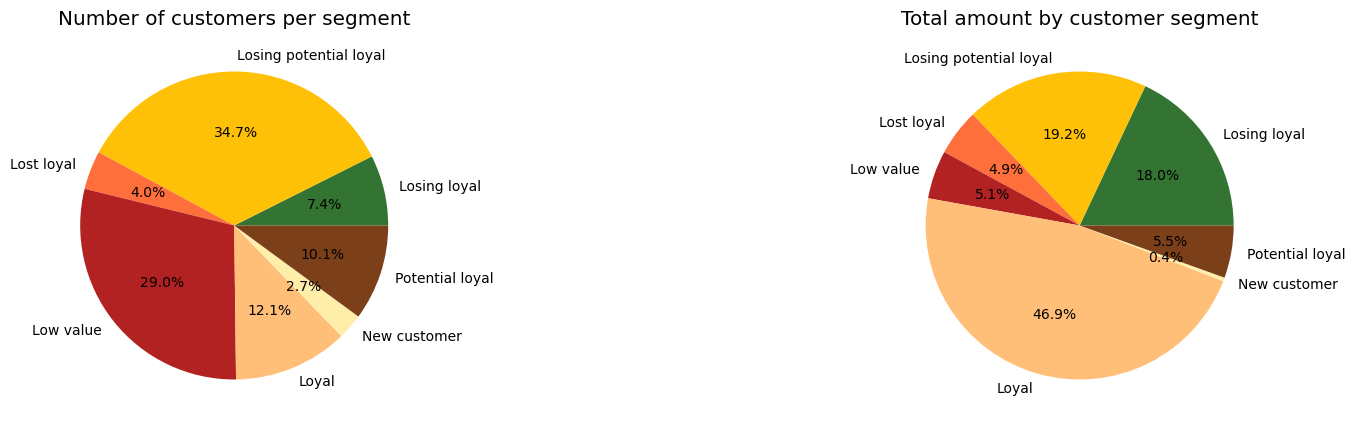

In [47]:
#segment_sort = ['Low value', 'Losing potential loyal', 'Lost loyal', 'Losing loyal','New customer','Potential loyal','Loyal']
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
ax1 = plt.pie(
    x = num_cust_segment['num_cust'], 
    labels = num_cust_segment['segment_cust'],
    autopct='%1.1f%%',
    colors=['#347433','#FFC107','#FF6F3C','#B22222','#FFBF78','#FFEEA9','#7B4019']
    
    )
plt.title('Number of customers per segment')

ax2= plt.subplot(1, 2, 2)

plt.pie(
    x = num_cust_segment['sum_amount'], 
    labels = num_cust_segment['segment_cust'],
    autopct='%1.1f%%',
    colors=['#347433','#FFC107','#FF6F3C','#B22222','#FFBF78','#FFEEA9','#7B4019']
    

)
plt.title('Total amount by customer segment')

plt.show()

tỷ lệ khách hàng và doanh thu theo từng phân khúc không tương đồng với nhau
Low value chiếm 29% lượng KH nhưng chỉ đem về doanh thu 5.1%
ngược lại Loyal chỉ chiếm 12.1% lượng KH nhưng đem lại doanh thu rất cao 46.9% => cần chú ý vào tệp KH này và chăm sóc tốt hơn VIP
Losing potential loyal chiếm lượng KH lớn nhất 34.7%, doanh thu đem lại 19.2% cũng tương đối nhưng vẫn chưa hiệu quả => tệp KH tiềm năng cần phát triển 

<h2> 9 - Customer Behavior Analysis Using Cohort Analysis<h2>
<h3>Mục tiêu: Xem retention của khách hàng mới qua thời gian.<h3>

In [48]:

num_cust_of_month = df.groupby(['year_month','first_order'])['cust_id'].nunique().reset_index()
num_cust_of_month.columns = ['year_month','first_order','total_customers']
num_cust_of_month.info()
num_cust_of_month.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year_month       78 non-null     object
 1   first_order      78 non-null     object
 2   total_customers  78 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.0+ KB


,year_month,first_order,total_customers
0,2010-12,2010-12,947
1,2011-01,2010-12,360
2,2011-01,2011-01,420
3,2011-02,2010-12,313
4,2011-02,2011-01,100


In [49]:
# Chuyển kiểu dữ liệu sang Period với tần suất theo tháng (Month)
num_cust_of_month['year_month'] = num_cust_of_month['year_month'].astype('period[M]')
num_cust_of_month['first_order'] = num_cust_of_month['first_order'].astype('period[M]')

# Kiểm tra kiểu dữ liệu mới
num_cust_of_month.info()

num_cust_of_month.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   year_month       78 non-null     period[M]
 1   first_order      78 non-null     period[M]
 2   total_customers  78 non-null     int64    
dtypes: int64(1), period[M](2)
memory usage: 2.0 KB


,year_month,first_order,total_customers
0,2010-12,2010-12,947
1,2011-01,2010-12,360
2,2011-01,2011-01,420
3,2011-02,2010-12,313
4,2011-02,2011-01,100
5,2011-02,2011-02,378
6,2011-03,2010-12,366
7,2011-03,2011-01,119
8,2011-03,2011-02,93
9,2011-03,2011-03,439


In [50]:
num_cust_of_month['cohort_index']=(num_cust_of_month['year_month']- num_cust_of_month['first_order']).apply(lambda x: x.n)
num_cust_of_month

,year_month,first_order,total_customers,cohort_index
0,2010-12,2010-12,947,0
1,2011-01,2010-12,360,1
2,2011-01,2011-01,420,0
3,2011-02,2010-12,313,2
4,2011-02,2011-01,100,1
...,...,...,...,...
73,2011-11,2011-07,52,4
74,2011-11,2011-08,42,3
75,2011-11,2011-09,97,2
76,2011-11,2011-10,91,1


In [51]:
cohort_pivot= (
    num_cust_of_month.pivot_table(
        index='first_order',
        columns='cohort_index',
        values='total_customers',
        #aggfunc='nunique',
        fill_value=0
    )
)
cohort_size = cohort_pivot.iloc[:, 0]
retention_table = cohort_pivot.divide(cohort_size, axis=0)
retention_table = (retention_table * 100).round(1)
retention_table = retention_table.reset_index() 
retention_table






cohort_index,first_order,0,1,2,3,4,5,6,7,8,9,10,11
0,2010-12,100.0,38.0,33.1,38.6,35.9,39.7,37.8,35.2,35.3,39.4,37.3,49.9
1,2011-01,100.0,23.8,28.3,24.3,32.4,30.0,26.2,25.5,30.7,34.5,36.9,0.0
2,2011-02,100.0,24.6,19.3,28.3,27.0,24.6,25.9,27.8,25.9,31.5,0.0,0.0
3,2011-03,100.0,18.9,25.3,21.9,22.8,17.8,26.2,23.7,28.7,0.0,0.0,0.0
4,2011-04,100.0,22.5,22.1,21.1,20.8,23.8,22.8,26.2,0.0,0.0,0.0,0.0
5,2011-05,100.0,23.7,17.2,17.2,21.5,24.4,26.5,0.0,0.0,0.0,0.0,0.0
6,2011-06,100.0,20.9,18.3,27.2,24.7,33.2,0.0,0.0,0.0,0.0,0.0,0.0
7,2011-07,100.0,21.5,20.4,23.7,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2011-08,100.0,24.6,24.6,25.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2011-09,100.0,30.1,32.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


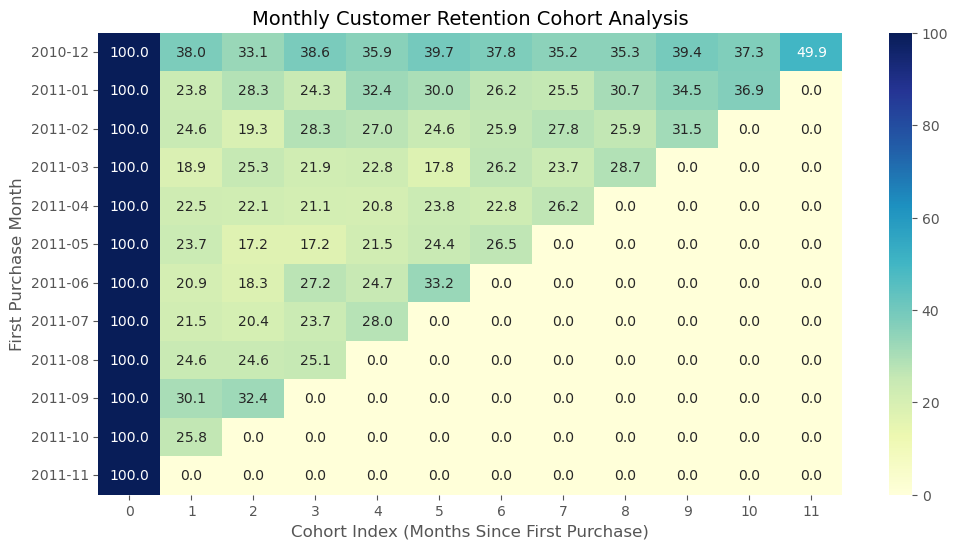

In [52]:
# Đưa first_order lại làm index
retention_heatmap = retention_table.set_index('first_order')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.heatmap(
    retention_heatmap,
    annot=True,
    fmt='.1f',        # 1 chữ số thập phân
    cmap='YlGnBu'
)

plt.title('Monthly Customer Retention Cohort Analysis', fontsize=14)
plt.xlabel('Cohort Index (Months Since First Purchase)')
plt.ylabel('First Purchase Month')
plt.show()

- Retention giảm mạnh ngay sau tháng đầu tiên (chỉ còn khoảng 18%–30%), cho thấy tỷ lệ churn sau lần mua đầu rất cao (~70–80%). 
- Không quan sát thấy xu hướng cải thiện retention theo thời gian giữa các cohort, cho thấy chiến lược giữ chân khách hàng chưa có sự thay đổi rõ rệt
- Cohort cuối năm 2010 có tỷ lệ quay lại vượt trội so với các cohort khác, có thể liên quan đến yếu tố mùa vụ hoặc các chiến dịch marketing cuối năm

=> Doanh nghiệp nên tập trung vào chiến lược giữ chân sau lần mua đầu tiên (đẩy mạnh chăm sóc KH sau mua, có chương trình cho KH thành viên,...)

<h2>10 - ABC Analysis<h2>


In [55]:
# tính tổng doanh thu và số lượng của mỗi sản phẩm
product_revenue = (df.groupby('description').agg(
            Total_quantity = ('quantity','sum'),
            Total_revenue = ('amount','sum')
)
).reset_index()
product_revenue = product_revenue.sort_values(
    by='Total_revenue',
    ascending=False
)

product_revenue.head() 


,description,Total_quantity,Total_revenue
1991,MEDIUM CERAMIC TOP STORAGE JAR,152223,158692.86
2764,REGENCY CAKESTAND 3 TIER,12829,147325.57
3700,WHITE HANGING HEART T-LIGHT HOLDER,38538,105017.66
1766,JUMBO BAG RED RETROSPOT,46123,84972.96
2341,PARTY BUNTING,15453,69476.73


In [56]:
# tính phần trăm doanh thu của mỗi sản phẩm và tích lũy phần trăm để phân loại ABC 
product_revenue['revenue_pct'] = product_revenue['Total_revenue']*100/product_revenue['Total_revenue'].sum()
product_revenue['cum_pct'] = product_revenue['revenue_pct'].cumsum()
product_revenue.head()

,description,Total_quantity,Total_revenue,revenue_pct,cum_pct
1991,MEDIUM CERAMIC TOP STORAGE JAR,152223,158692.86,1.860608,1.860608
2764,REGENCY CAKESTAND 3 TIER,12829,147325.57,1.727331,3.587940
3700,WHITE HANGING HEART T-LIGHT HOLDER,38538,105017.66,1.231289,4.819228
1766,JUMBO BAG RED RETROSPOT,46123,84972.96,0.996273,5.815501
2341,PARTY BUNTING,15453,69476.73,0.814586,6.630087


In [57]:
#phan loai ABC
def ABC_classify(x):
    if x > 95:
        return 'C'
    elif x > 80:
        return 'B'
    else:
        return 'A'
    
product_revenue['ABC_group'] = product_revenue['cum_pct'].apply(ABC_classify)
product_revenue

,description,Total_quantity,Total_revenue,revenue_pct,cum_pct,ABC_group
1991,MEDIUM CERAMIC TOP STORAGE JAR,152223,158692.86,1.860608,1.860608,A
2764,REGENCY CAKESTAND 3 TIER,12829,147325.57,1.727331,3.587940,A
3700,WHITE HANGING HEART T-LIGHT HOLDER,38538,105017.66,1.231289,4.819228,A
1766,JUMBO BAG RED RETROSPOT,46123,84972.96,0.996273,5.815501,A
2341,PARTY BUNTING,15453,69476.73,0.814586,6.630087,A
...,...,...,...,...,...,...
2636,PURPLE FRANGIPANI HAIRCLIP,1,0.85,0.000010,99.999968,C
2441,PINK CRYSTAL GUITAR PHONE CHARM,1,0.85,0.000010,99.999978,C
3556,VINTAGE BLUE TINSEL REEL,2,0.84,0.000010,99.999987,C
2930,SET 12 COLOURING PENCILS DOILEY,1,0.65,0.000008,99.999995,C


In [58]:
#số lượng loại sản phẩm trong mỗi nhóm
product_revenue['ABC_group'].value_counts().sort_values(ascending=True)

ABC_group
A     816
B     956
C    2108
Name: count, dtype: int64

In [59]:
# tính số lượng sản phẩm bán ra của mỗi nhóm để so sánh với revenue đem lại
# tạo bảng mới chỉ chứa ABC 
ABC_summary = product_revenue.groupby('ABC_group').agg(
    total_products=('description', 'count'),
    total_revenue=('Total_revenue', 'sum')
)

ABC_summary['product_pct'] = (
    ABC_summary['total_products'] /
    ABC_summary['total_products'].sum() * 100
)

ABC_summary['revenue_pct'] = (
    ABC_summary['total_revenue'] /
    ABC_summary['total_revenue'].sum() * 100
)

ABC_summary.round(1)

,total_products,total_revenue,product_pct,revenue_pct
ABC_group,,,,
A,816,6821299.8,21.0,80.0
B,956,1280684.3,24.6,15.0
C,2108,427101.2,54.3,5.0


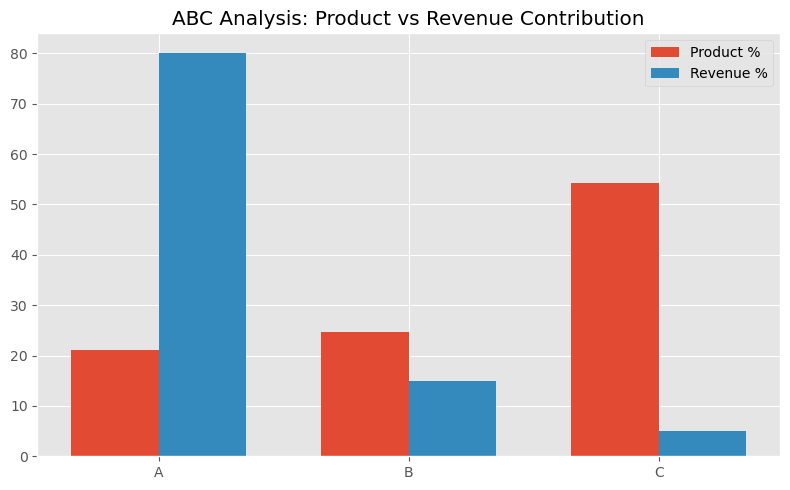

In [60]:

import numpy as np

x = np.arange(len(ABC_summary.index))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(
    x - width/2,
    ABC_summary['product_pct'],
    width,
    label='Product %'
)

plt.bar(
    x + width/2,
    ABC_summary['revenue_pct'],
    width,
    label='Revenue %'
)

plt.xticks(x, ABC_summary.index)

plt.title('ABC Analysis: Product vs Revenue Contribution')
plt.xlabel('')
plt.ylabel('')
plt.legend()

plt.tight_layout()
plt.show()

Nhóm A là nhóm sản phẩm chiến lược. Tuy chỉ chiếm 21% trên tổng số lượng sản phẩm nhưng đem lại doanh thu cao 80%.
=> Nên tập trung vào nhóm này. Kiểm tra kỹ tồn kho tránh out-of-stock vì nó sẽ ảnh hướng đến doanh thu của công ty.
Đồng thời đẩy mạnh marketing và các chương trình khuyến mãi cho nhóm này
Nhóm B chiếm 15% doanh thu - nhóm trung bình
=> Nếu có chiến lược marketing và chương trình giá tốt => có tiềm năng phát triển thành nhóm A trong tương lai
Nhóm C - nhóm chiếm số lượng nhiều nhất nhưng doanh thu chỉ 5%
=> Có thể giảm bớt số lượng tồn kho, thậm chí 1 số sản phẩm doanh thu quá thấp có thể loại bỏ bớt để tiết kiệm chi phí marketing, kho cũng như nhân lực

<h2>Câu 12. Dự báo doanh thu tháng tới (Forecasting)<h2>

In [61]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount,day,month,hour,year_month,week_days,first_order,cust_type
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,1,12,8,2010-12,Wednesday,2010-12,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday,2010-12,New
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,1,12,8,2010-12,Wednesday,2010-12,New
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday,2010-12,New
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1,12,8,2010-12,Wednesday,2010-12,New


In [94]:
# tinh doanh thu theo thang
monthly_revenue  = df.groupby('year_month')['amount'].sum().reset_index()
monthly_revenue.head()


,year_month,amount
0,2010-12,582992.30
1,2011-01,654160.28
2,2011-02,450766.51
3,2011-03,593827.15
4,2011-04,488148.99


In [95]:
# chuyển sang kiểu datetime 
monthly_revenue['year_month'] = pd.to_datetime(monthly_revenue['year_month'])
monthly_revenue = monthly_revenue.sort_values('year_month')
monthly_revenue.set_index('year_month', inplace=True)



In [78]:
from sklearn.linear_model import LinearRegression
import numpy as np

monthly_revenue['time_index'] = np.arange(len(monthly_revenue))

X = monthly_revenue[['time_index']]
y = monthly_revenue['amount']

model = LinearRegression()
model.fit(X, y)

next_month_index = np.array([[len(monthly_revenue)]])
forecast = model.predict(next_month_index)

print("Forecast revenue next month:", round(forecast[0], 2))

Forecast revenue next month: 1030742.1


c:\Users\PhuongHong\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


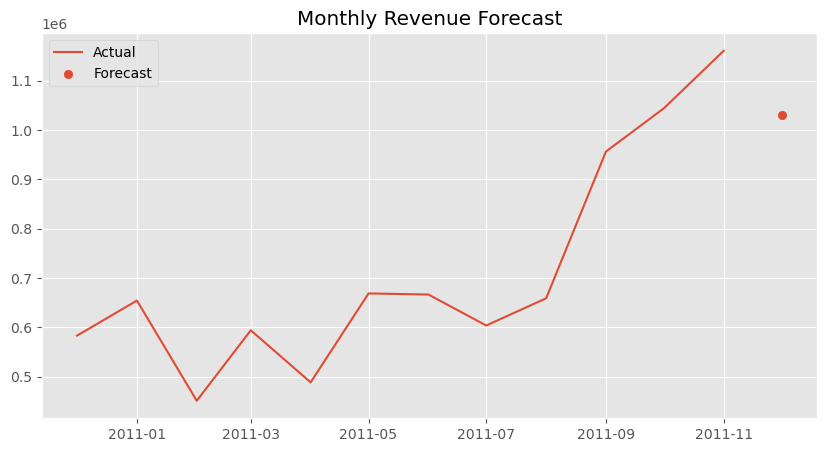

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.plot(monthly_revenue.index,
         monthly_revenue['amount'],
         label='Actual')

plt.scatter(
    monthly_revenue.index[-1] + pd.DateOffset(months=1),
    forecast,
    label='Forecast'
)

plt.title('Monthly Revenue Forecast')
plt.legend()

plt.show()